# Brute force

Dans ce notebook, nous résolvons le jeu "Taxi" de la bibliothèque OpenAI Gym en utilisant une approche de force brute. Cette méthode consiste à déplacer le taxi de manière aléatoire jusqu'à atteindre l'objectif. Bien que non optimisée, cette approche simple permet de comprendre les bases du fonctionnement de l'environnement.

In [8]:
# import dependencies
import gym
import random

In [9]:
class Env:
    env = None

    # Inits the environement and returns the first state
    def init_env(self):
        self.env = gym.make('Taxi-v3', render_mode='ansi')
        reset = self.env.reset()

        return reset
    
    def render_state(self):
        print(self.env.render())

    # Take an action passed as an argument
    def take_action(self, action, render = False):
        infos = self.env.step(action)

        if(render):
            self.render_state()

        return infos

env = Env()
initial_state = env.init_env()

env.render_state()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




In [10]:
# Actions possibles (0: South, 1: North, 2: East, 3: West, 4: Pickup, 5: Dropoff)
actions = [0, 1, 2, 3, 4, 5]

In [11]:
class BruteForce:
    def __init__(self, env):
        self.env = Env()
        self.has_passanger = False
        self.score = 0
        self.steps = 0

        self.compass = {0: "↓", 1: "↑", 2: "->", 3: "<-"}

    def try_pick_up(self, show_pick = False):
        new_state, reward, done, truncated, info = self.env.take_action(4)

        if(reward == -1):    
            if show_pick:
                print("Passanger Acquired")
            self.has_passanger = True

        self.score += reward

    def try_put_down(self, show_del = False):
        new_state, reward, done, truncated, info = self.env.take_action(5)

        self.score += reward


        if done :
            if show_del:
                print("Passanger Delivered")
        else:
            self.try_pick_up()

        return done

    def move(self, show_move = False, render = False):
        # Random action selection
        action = random.randint(0,3) 

        new_state, reward, done, truncated, info = self.env.take_action(action)
        
        if(show_move == True):
            print(f"    Je vais à : {self.compass[action]}")

        self.score += reward
        self.steps += 1

        if(render == True):
            self.env.render()

    def run(self, show_res = False):
        self.env.init_env()
        done = False;

        while not done:
            if self.has_passanger:
                done = self.try_put_down()
            else:
                self.try_pick_up()

            self.move(env);
        
        if show_res:
            print("Done with a score of " + str(self.score))
            print("Finished in " + str(self.steps) + " steps")

        return self.steps



L'exploration de l'environement se fait aléatoirement.

Nous essayons de récuperer le passager à chaque déplacement. Si le passager est récuperer on tente également de le déposer à chaque déplacement.

In [12]:
avg = 0
over = 100

list = []

for i in range(over):
    brute_force = BruteForce(env)

    # print("Run n°", i)
    run = brute_force.run()
    list.append(run)
    avg += run

avg /= over




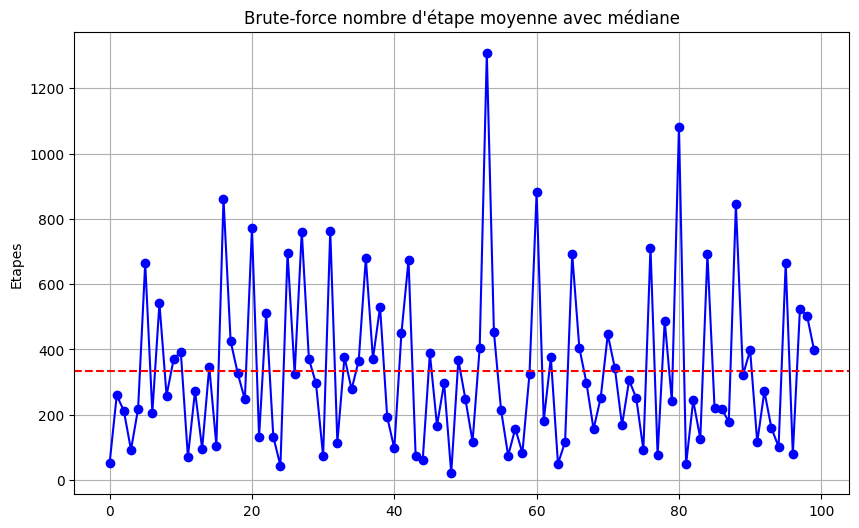

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Ajouter les valeurs au graphique
plt.plot(list, marker='o', linestyle='-', color='b')

# Ajouter une ligne de médiane
plt.axhline(y=avg, color='r', linestyle='--', label=f'Médiane = {avg}')

# Ajouter des titres et des labels
plt.title('Brute-force nombre d\'étape moyenne avec médiane')
plt.ylabel('Etapes')

# Afficher une grille
plt.grid(True)

# Afficher le graphique
plt.show()

In [14]:
print("En moyenne avec la méthode brute force il faut faire ", avg, "étapes.")

En moyenne avec la méthode brute force il faut faire  335.3 étapes
